### 클로라이드(Chlorides) 규칙 찾기

In [1]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df1=df.drop_duplicates()

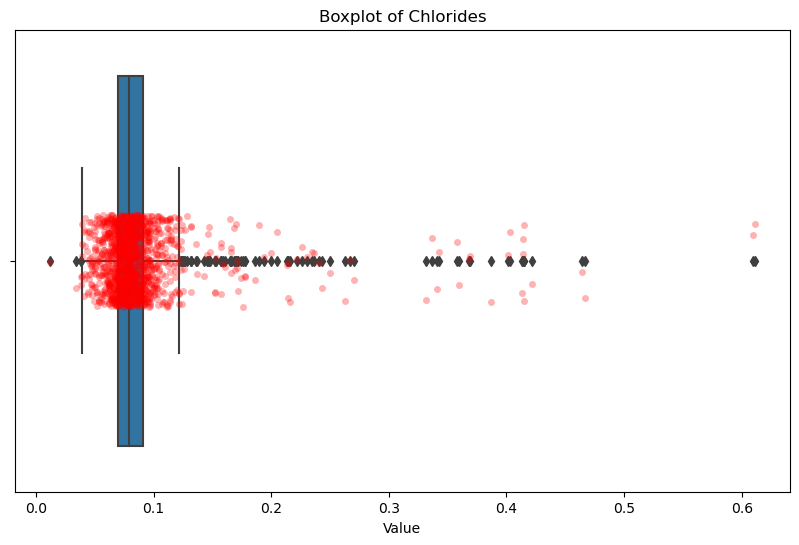

In [2]:
# Boxplot 그리기
import seaborn as sns
import matplotlib.pyplot as plt
import math

plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['chlorides'], whis=1.5)  # whis 조절
sns.stripplot(x=df1['chlorides'], color='red', marker='o', alpha=0.3)  # 이상치 마커 설정
plt.title('Boxplot of Chlorides')
plt.xlabel('Value')
plt.show()   

Cumulative Distribution of Outliers in column 'Chlorides' :
Number of outliers: 87
0.03850000000000002 0.12249999999999998


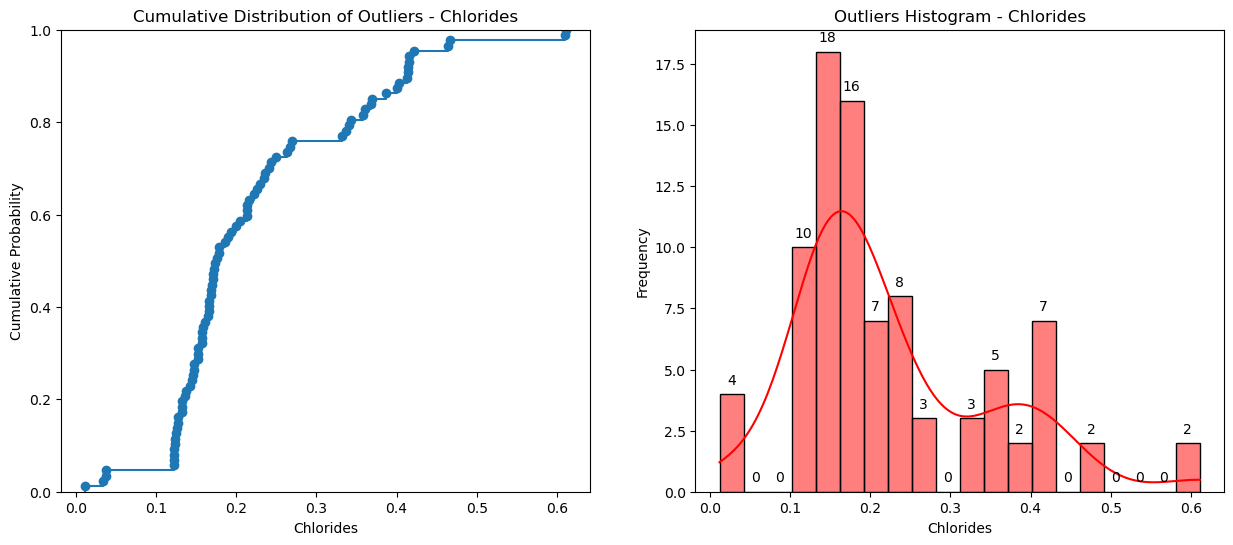

In [3]:
# 이상치 누적분포 함수 & 이상치의 히스토그램

print(f"Cumulative Distribution of Outliers in column 'Chlorides' :")
    

# IQR 계산
Q1 = df1['chlorides'].quantile(0.25)
Q3 = df1['chlorides'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 추출
chlorides_outliers = df1[(df1['chlorides'] < lower_bound) | (df1['chlorides'] > upper_bound)]['chlorides']
 
# 이상치를 제거한 DataFrame 생성
df1_no_outliers = df1[(df1['chlorides'] >= lower_bound) & (df1['chlorides'] <= upper_bound)]['chlorides']   
    
# 이상치를 제거한 DataFrame 크기순으로 정렬
sorted_outliers = chlorides_outliers.sort_values()

# 이상치 개수 출력
outlier_count = sorted_outliers.count()
print(f"Number of outliers: {outlier_count}")
    
# 이상치 누적분포 함수 그리기
plt.figure(figsize=(15, 6))
    
plt.subplot(1, 2, 1)  # 그리드 1행 2열 중 첫 번째 subplot
sns.ecdfplot(sorted_outliers, marker='o', linestyle='-')
plt.title(f"Cumulative Distribution of Outliers - Chlorides")
plt.xlabel('Chlorides')
plt.ylabel("Cumulative Probability")
    
plt.subplot(1, 2, 2)  # 그리드 1행 2열 중 두 번째 subplot
ax = sns.histplot(sorted_outliers, bins=20, kde=True, color='red')
plt.title(f"Outliers Histogram - Chlorides")
plt.xlabel('Chlorides')
plt.ylabel("Frequency")

for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        
    
print(lower_bound,upper_bound)

In [4]:
df1_no_outliers

0       0.076
1       0.098
2       0.092
3       0.075
5       0.075
        ...  
1593    0.068
1594    0.090
1595    0.062
1597    0.075
1598    0.067
Name: chlorides, Length: 1272, dtype: float64

In [5]:
# 이상치를 임의로 모두 제거한 데이터프레임
# 정규성 검사
from scipy.stats import shapiro
import numpy as np

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(df1_no_outliers)

# 결과 출력
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# P-value를 기준으로 귀무가설의 기각 여부 판단
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 않음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)")



Shapiro-Wilk Test Statistic: 0.9904307126998901
P-value: 2.2911294195182563e-07
데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)


In [6]:
#이상치 추출 데이터프레임
#정규성 검사

# 샤피로-윌크 검정 수행
statistic, p_value = shapiro(sorted_outliers)

# 결과 출력
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# P-value를 기준으로 귀무가설의 기각 여부 판단
alpha = 0.05
if p_value > alpha:
    print("데이터는 정규 분포를 따릅니다. (귀무가설을 기각하지 않음)")
else:
    print("데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)")

Shapiro-Wilk Test Statistic: 0.8841235041618347
P-value: 1.1971534377153148e-06
데이터는 정규 분포를 따르지 않습니다. (귀무가설을 기각)


In [7]:
# 평균, 표준편차, 최소, 최대, 사분위값
sorted_outliers.describe()

count    87.000000
mean      0.224862
std       0.121294
min       0.012000
25%       0.146500
50%       0.176000
75%       0.268500
max       0.611000
Name: chlorides, dtype: float64

In [8]:
# 이상치 비율
chlorides_outliers.rate = sorted_outliers.count()/df1['chlorides'].count()
print("전체 Chlorides 이상치 비율 :", chlorides_outliers.rate)

전체 Chlorides 이상치 비율 : 0.0640176600441501


In [9]:
import pandas as pd
from scipy.stats import shapiro
import numpy as np

# Series에서 수치 0.2를 기준으로 이하의 값을 가지는 데이터만 남기기
threshold = 0.2
outliers_to_add = sorted_outliers[sorted_outliers > threshold]
filtered_series = df1_no_outliers.append(outliers_to_add).sort_values()

# 정규성 검정 수행
statistic, p_value = shapiro(filtered_series)

# 결과 출력
print(f"Shapiro-Wilk Test for the Series:")
print(f"  - Shapiro-Wilk Test Statistic: {statistic}")
print(f"  - P-value: {p_value}")

# P-value를 기준으로 귀무가설의 기각 여부 판단
alpha = 0.05
if p_value > alpha:
    print("    => 데이터는 정규 분포를 따릅니다 (귀무가설을 기각하지 않음)")
else:
    print("    => 데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)")

Shapiro-Wilk Test for the Series:
  - Shapiro-Wilk Test Statistic: 0.42244064807891846
  - P-value: 0.0
    => 데이터는 정규 분포를 따르지 않습니다 (귀무가설을 기각)


C:\Users\leeyh\AppData\Local\Temp\ipykernel_20684\538086184.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filtered_series = df1_no_outliers.append(outliers_to_add).sort_values()


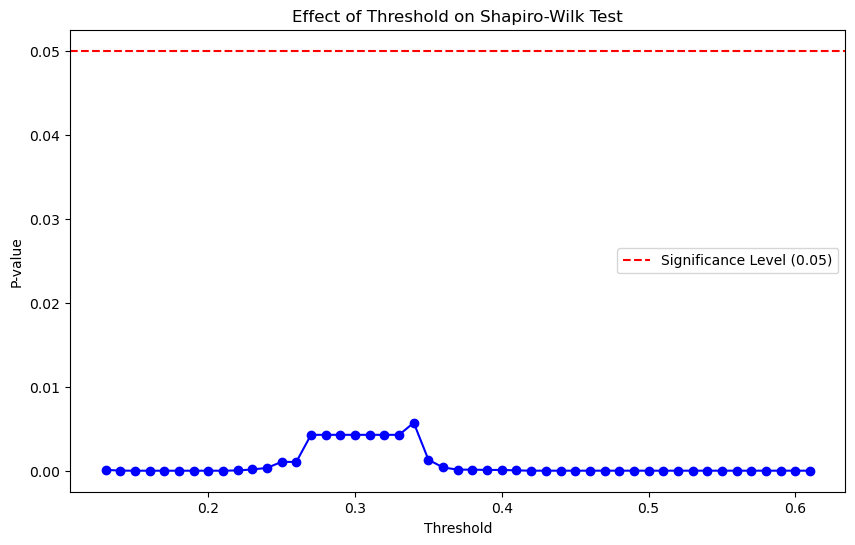

Maximum p-value: 0.0057 at threshold: 0.34


In [10]:
# 이상치를 제거한 데이터프레임에 임계값에 대해 이상치 데이터프레임 일부를 차례로 추가하며

# 이상치 데이터프레임에 대해

# 여러 임계값에 대해 검정 수행
thresholds = np.arange(0.13, 0.62, 0.01)
p_values = []

for threshold in thresholds:
    filtered_series = sorted_outliers[sorted_outliers < threshold]
    statistic, p_value = shapiro(filtered_series)
    
    p_values.append(p_value)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, p_values, marker='o', linestyle='-', color='b')
plt.title('Effect of Threshold on Shapiro-Wilk Test')
plt.xlabel('Threshold')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

# p-value가 최대로 출력될 때의 임계값 찾기
max_p_value_index = np.argmax(p_values)
optimal_threshold = thresholds[max_p_value_index]

# 최대 p-value와 해당하는 임계값 출력
print(f"Maximum p-value: {p_values[max_p_value_index]:.4f} at threshold: {optimal_threshold:.2f}")

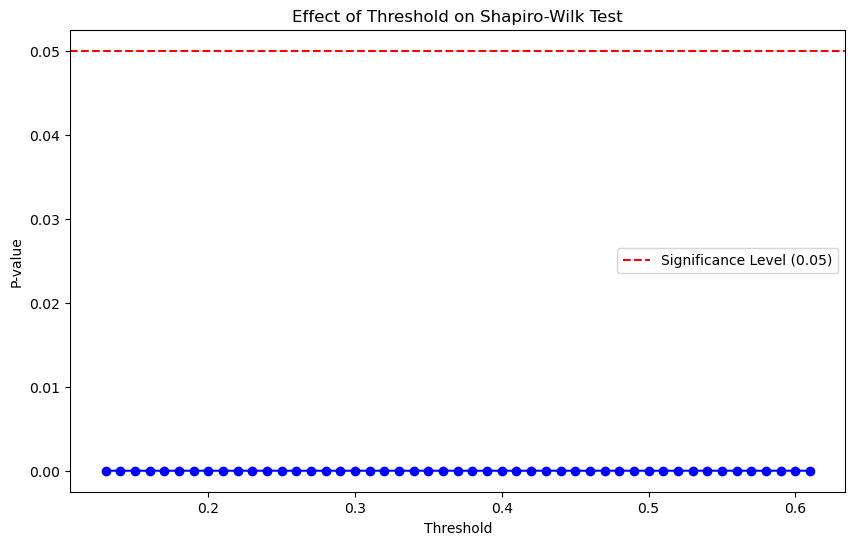

Maximum p-value: 0.0000 at threshold: 0.13


In [11]:
# 여러 임계값에 대해 검정 수행
thresholds = np.arange(0.13, 0.62, 0.01)
p_values = []

for threshold in thresholds:
    # 임계값에 해당하는 이상치 추가
    outliers_to_add = sorted_outliers[sorted_outliers < threshold]
    filtered_series = pd.concat([df1_no_outliers, pd.Series(outliers_to_add)]).sort_values()

    

    statistic, p_value = shapiro(filtered_series)
    
    p_values.append(p_value)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(thresholds, p_values, marker='o', linestyle='-', color='b')
plt.title('Effect of Threshold on Shapiro-Wilk Test')
plt.xlabel('Threshold')
plt.ylabel('P-value')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.legend()
plt.show()

# p-value가 최대로 출력될 때의 임계값 찾기
max_p_value_index = np.argmax(p_values)
optimal_threshold = thresholds[max_p_value_index]

# 최대 p-value와 해당하는 임계값 출력
print(f"Maximum p-value: {p_values[max_p_value_index]:.4f} at threshold: {optimal_threshold:.2f}")

